# Agent Graph Visualization

This notebook demonstrates how to create and visualize a multi-agent system with a supervisor that coordinates math and research agents.

In [2]:
%pip install networkx matplotlib -q

Note: you may need to restart the kernel to use updated packages.


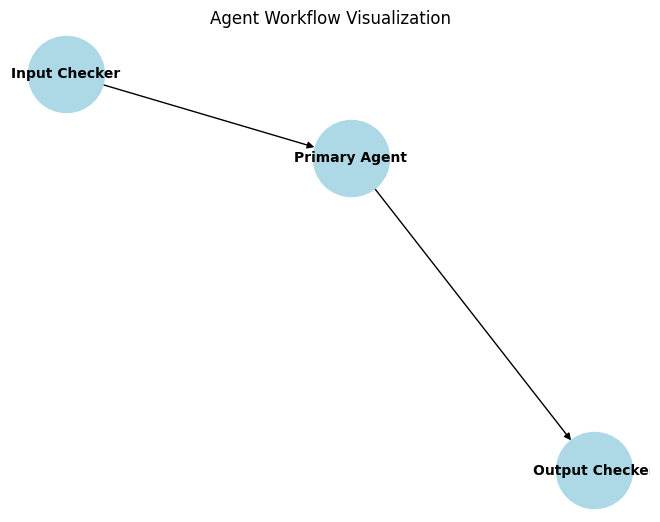

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_agent_workflow():
    # Create a directed graph
    G = nx.DiGraph()

    # Define the nodes (agents)
    nodes = [
        "Input Checker",
        "Primary Agent",
        "Output Checker"
    ]

    # Add nodes to the graph
    G.add_nodes_from(nodes)

    # Define the edges (connections between agents)
    edges = [
        ("Input Checker", "Primary Agent"),
        ("Primary Agent", "Output Checker"),
    ]

    # Add edges to the graph
    G.add_edges_from(edges)

    # Create a layout for the nodes
    pos = nx.spring_layout(G, seed=32)  # Seed the layout for reproducibility

    # Draw the nodes and edges
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

    # Set the title
    plt.title("Agent Workflow Visualization")
    
    # Show the plot
    plt.show()

# Call the function to visualize the agent workflow
visualize_agent_workflow()

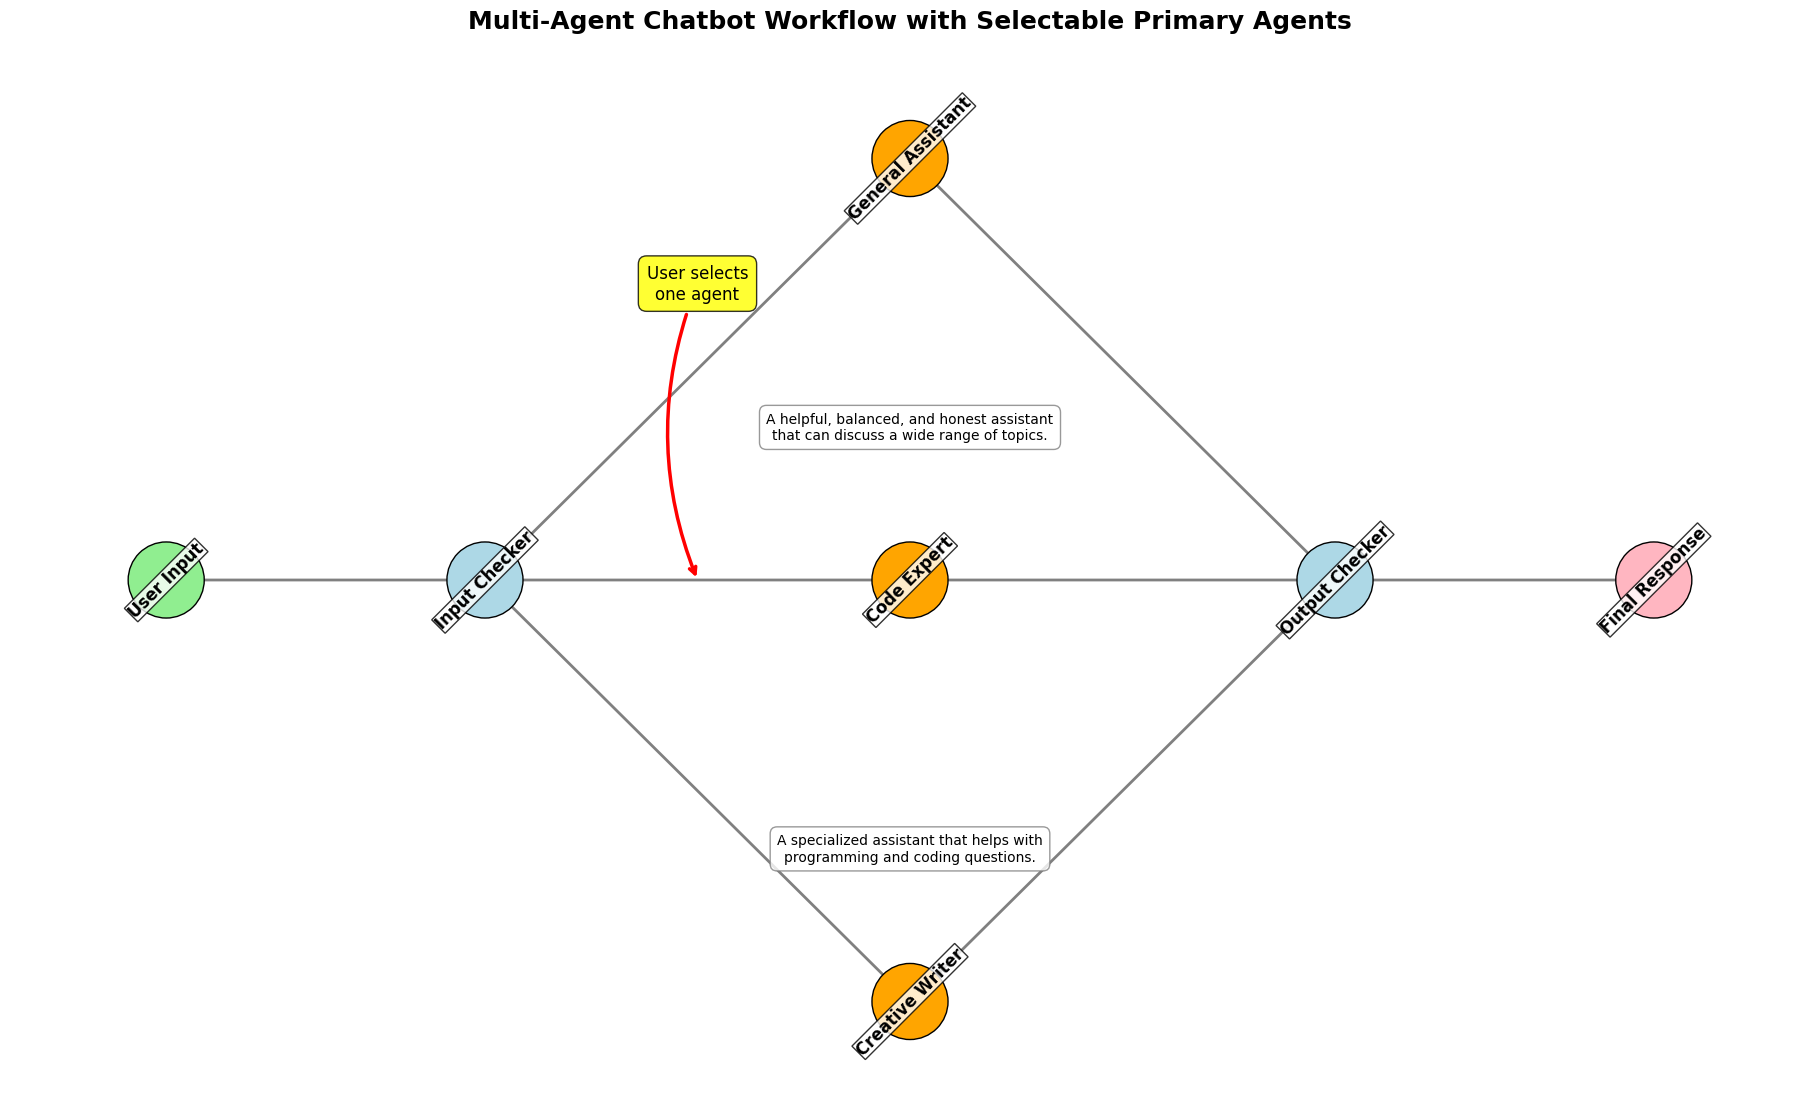

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a directed graph
G = nx.DiGraph()

# Define the nodes (agents) with their types
nodes = {
    "User Input": "input",
    "Input Checker": "processor",
    "General Assistant": "primary_agent",
    "Code Expert": "primary_agent",
    "Creative Writer": "primary_agent", 
    "Output Checker": "processor",
    "Final Response": "output"
}

# Add nodes to the graph
for node, node_type in nodes.items():
    G.add_node(node, type=node_type)

# Define the edges (connections between agents)
edges = [
    ("User Input", "Input Checker"),
    ("Input Checker", "General Assistant"),
    ("Input Checker", "Code Expert"),
    ("Input Checker", "Creative Writer"),
    ("General Assistant", "Output Checker"),
    ("Code Expert", "Output Checker"),
    ("Creative Writer", "Output Checker"),
    ("Output Checker", "Final Response")
]

# Add edges to the graph
G.add_edges_from(edges)

# Create a layout for the nodes with even more space
pos = {
    "User Input": (0, 4),
    "Input Checker": (3, 4),
    "General Assistant": (7, 7),  # Moved higher up and further right
    "Code Expert": (7, 4),        # Kept centered but moved right
    "Creative Writer": (7, 1),    # Moved further right
    "Output Checker": (11, 4),    # Moved further right
    "Final Response": (14, 4)     # Moved further right
}

# Node color mapping based on type
color_map = {
    "input": "lightgreen",
    "processor": "lightblue",
    "primary_agent": "orange",
    "output": "lightpink"
}

# Get node colors based on their type
node_colors = [color_map[G.nodes[node]['type']] for node in G.nodes]

# Create a much larger figure
plt.figure(figsize=(20, 12))

# Draw the nodes with larger size
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors, edgecolors='black')

# Draw the edges with arrows (increased size and visibility)
nx.draw_networkx_edges(G, pos, 
                       arrows=True, 
                       arrowstyle='->', 
                       arrowsize=25,  # Increased arrow size
                       edge_color='gray', 
                       width=2.0)     # Increased width

# Draw the labels with 45 degree rotation and increased font size
text_items = {}
for node, (x, y) in pos.items():
    text_items[node] = plt.text(x, y, node, 
                               rotation=45,
                               fontsize=12,  # Increased font size
                               fontweight='bold',
                               ha='center', va='center',
                               bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', pad=0.4))

# Add agent descriptions based on models.py with increased spacing
agent_descriptions = {
    "General Assistant": "A helpful, balanced, and honest assistant\nthat can discuss a wide range of topics.",
    "Code Expert": "A specialized assistant that helps with\nprogramming and coding questions.",
    "Creative Writer": "An assistant focused on creative writing,\nstorytelling, and content generation."
}

# Add annotations for primary agents with better positioning and larger text
for agent, description in agent_descriptions.items():
    x, y = pos[agent]
    plt.annotate(description, 
                xy=(x, y-0.7),  # Adjusted to be farther from the node
                xytext=(x, y-2.0),  # Moved annotation text further down
                fontsize=10,  # Increased font size
                ha='center',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8, 
                         edgecolor='gray'))

# Create legend at the bottom with better positioning
# legend_elements = [
#     mpatches.Patch(color='lightgreen', label='Input'),
#     mpatches.Patch(color='lightblue', label='Processor Agents'),
#     mpatches.Patch(color='orange', label='Primary Agents (Selectable)'),
#     mpatches.Patch(color='lightpink', label='Output')
# ]

# plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 0.02), 
#            fontsize=12, frameon=True, fancybox=True, shadow=True, ncol=4)

# Indicate user selection with a special arrow - repositioned for visibility
select_text = "User selects\none agent"
plt.annotate(select_text, 
            xy=(5, 4),  # Adjusted to be more visible
            xytext=(5, 6),  # Positioned higher
            fontsize=12,  # Increased font size
            ha='center',
            arrowprops=dict(arrowstyle="->", color="red", lw=2.5, connectionstyle="arc3,rad=0.2"),
            bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.8, 
                     edgecolor='black'))

# Set margins to ensure nothing gets cut off - increased margins
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)

# Set the title with increased size
plt.title("Multi-Agent Chatbot Workflow with Selectable Primary Agents", 
          fontsize=18, fontweight='bold', pad=30)

plt.axis('off')  # Turn off the axis

# Save high quality image (optional)
# plt.savefig('agent_workflow.png', dpi=300, bbox_inches='tight')

plt.show()